# Geometry Optimization and Vibrational Frequency

These notes discuss various aspects concerning the nuclear motion of atoms in the molecule. The topics in this notes are as follows:
- Potential energy surfaces
- Geometry optimization
- Rotational and vibrational spectroscopy
- Thermodynamic analysis

These topics are not specific to quantum chemistry but are also applicable in classical mechanics. However, we will focus here on the quantum mechanical calculations of these properties.  

## Potential Energy Surfaces
The potential energy surface is the potential energy of the molecule as a function of the various possible arrangements of the atoms. This concept is possible at the quantum level because of the Born-Oppenheimer approximation discussed before. The total number of degrees of freedom in a molecule with $N$ atoms is $3N$ because each atom has three Cartesian coordinates (x, y, z). However, in the absence of an external field, the potential energy of the molecule does not change if the molecule is rotated or translated. Thus, the potential energy surface is a function of the *internal* coordinates. For a nonlinear molecule, there are three rotational degrees of freedom, while for a linear molecule there are only two. For both linear and nonlinear molecules, there are three translational degrees of freedom. Thus, the total number of internal degrees of freedom $3N-6$ for nonlinear molecules and $3N-5$ for linear molecules. These internal degrees of freedom can be enumerated, for example, in terms of the bonds, angles, and torsions of the molecules, but other representations are also possible.

Below we show the potential energy surface for the F$_2$ molecule computed at different levels of theory. Because this is a dimer, there is only one degree of freedom, which is the distance between the two atoms. We will calculate the energy at 25 different bond lengths.

<IPython.core.display.Javascript object>


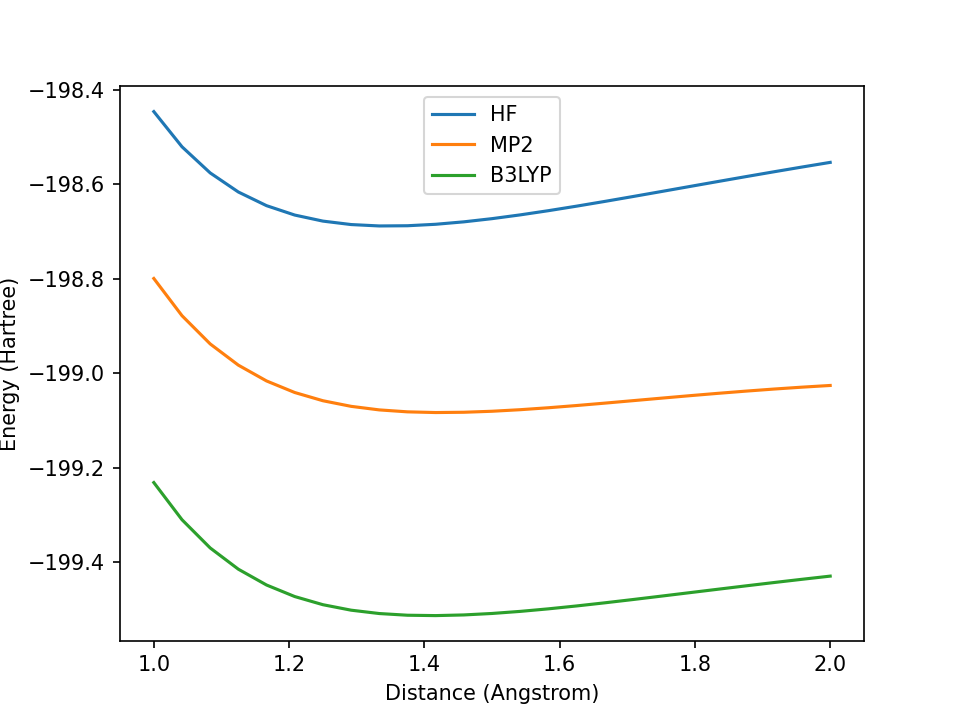

The minimum energy structure for HF is at 1.33 Angstroms.
The minimum energy structure for B3LYP is at 1.42 Angstroms.
The minimum energy structure for MP2 is at 1.42 Angstroms.


In [18]:
import psi4
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

psi4.set_output_file("output.dat", True)
mol = psi4.geometry("""
F
F 1 x""")

distances = np.linspace(1, 2, 25)
energies_scf = []
energies_b3lyp = []
energies_mp2 = []
for d in distances:
    mol.x = d
    energies_scf.append(psi4.energy("scf/cc-pvdz"))
    energies_b3lyp.append(psi4.energy("b3lyp/cc-pvdz"))
    energies_mp2.append(psi4.energy("mp2/cc-pvdz"))

plt.figure()
plt.plot(distances, energies_scf, label="HF")
plt.plot(distances, energies_mp2, label="MP2")
plt.plot(distances, energies_b3lyp, label="B3LYP")

plt.legend()
plt.xlabel("Distance (Angstrom)")
plt.ylabel("Energy (Hartree)")
plt.show()

print("The minimum energy structure for HF is at %.2f Angstroms." %distances[np.argmin(energies_scf)])
print("The minimum energy structure for B3LYP is at %.2f Angstroms." %distances[np.argmin(energies_b3lyp)])
print("The minimum energy structure for MP2 is at %.2f Angstroms." %distances[np.argmin(energies_mp2)])

We can notice a few things on the above plot. First, because there is a single degree of freedom, this is actually a curve not a surface. If there are two or more degrees of freedom, we obtain surfaces or hypersurfaces. For this reason, it is not possible to represent the full potential energy surface of a complex molecule visually in a plot. 

The second observation is that different methods give differnt potential energy surfaces. Not only are the *absolute* values of the energy are different, but so are the *relative* values. Thus, the shape of the potential energy surface is sensitive to the theoretical method.

The most important point in the potential energy surface is the **minimum**, which represents the most stable configuration of the molecule. Different theoretical methods can predict different minimum structures. For example, Hartree-Fock theory with the cc-pVDZ underestimates the equilibrium bond length for F$_2$ compared to MP2 and B3LYP. For comparison, the experimental value is 1.41 Angstroms.

Now let's consider a more complicated molecule. H$_2$O is a nonlinear molecule that has three atoms. There are two parameters that define its geometry in the C$_{2v}$ symmetry, namely the distance from the two hydrogen atoms to the oxygen atom, and the angle between the three atoms. Let's explore the potential energy surface of H$_2$O around its minimum structure. We will perform a 100 energy evaluations. We will construct a grid of points with 10 bond lengths and 10 bond angles and calculate the energy at each of the grid points.

<IPython.core.display.Javascript object>


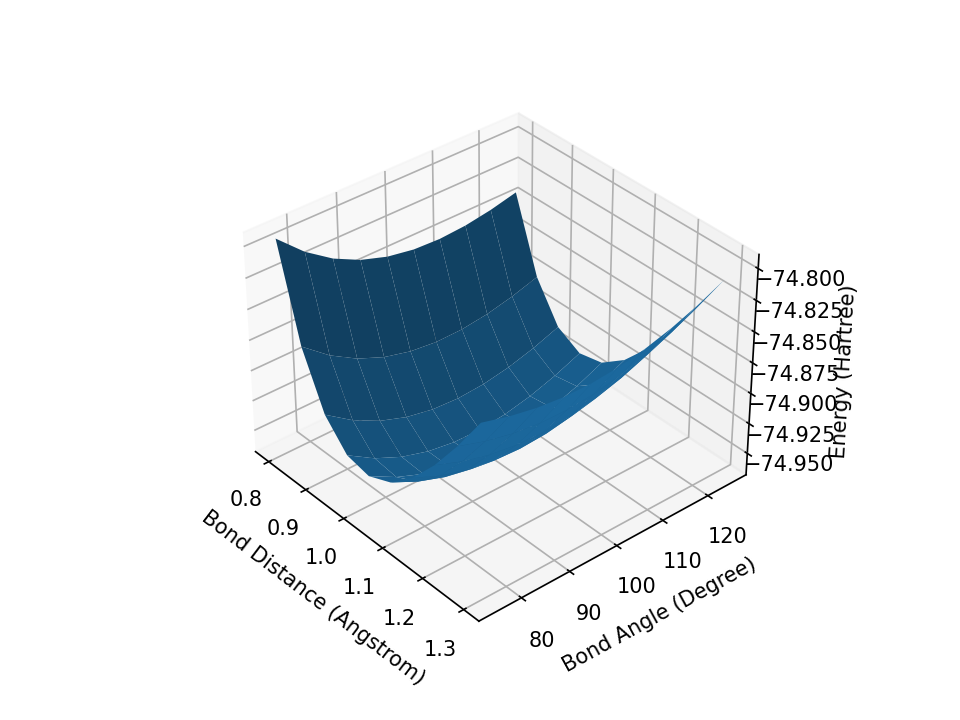

The minimum energy structure has 0.97 Angstrom bond length and 102.8 degree bond angle.


In [19]:
import psi4
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

psi4.set_output_file("output.dat", True)
mol = psi4.geometry("""
O
H 1 x
H 1 x 2 y""")


X = np.linspace(0.8, 1.3, 10)
Y = np.linspace(75, 125, 10)
X, Y = np.meshgrid(X, Y)

energies = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        mol.x = X[i, j]
        mol.y = Y[i, j]
        energies[i, j] = psi4.energy("scf/sto-3g")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, energies)
ax.set_xlabel("Bond Distance (Angstrom)")
ax.set_ylabel("Bond Angle (Degree)")
ax.set_zlabel("Energy (Hartree)")

plt.show()

minimum_index = np.unravel_index(np.argmin(energies), energies.shape)
print("The minimum energy structure has %.2f Angstrom bond length and %.1f degree bond angle."
       %(X[minimum_index], Y[minimum_index]))

We can see above the potential energy surface for water molecule around its minimum geometry. The energy increases if you go in any direction around the minimum. The predicted minimum energy structure has a 1.02 Angstrom bond length and a 97.2 degrees bond angle. This is a little different from the experimental structure, which has a 0.958 Angstrom bond length and a 104.5 degrees bond angle. Besides the inaccuracy of the method, this error is observed because we have not sampled enough points in the potential energy surface.

Now, let's consider the potential energy surface of the water molecule around the linear geometry. Obviously, the water molecule is nonlinear and therefore the linear structure will be high in energy. 

<IPython.core.display.Javascript object>


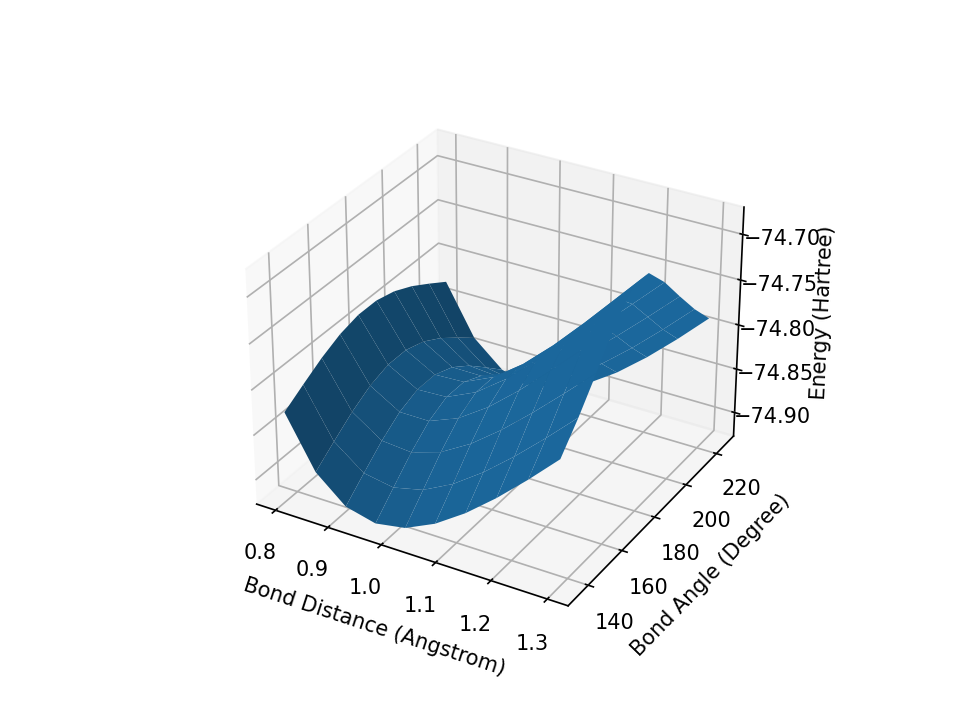

In [3]:
import psi4
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

psi4.set_output_file("output.dat", True)
mol = psi4.geometry("""
O
H 1 x
H 1 x 2 y""")


X = np.linspace(0.8, 1.3, 10)
Y = np.linspace(135, 225, 10)
X, Y = np.meshgrid(X, Y)

energies = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        mol.x = X[i, j]
        mol.y = Y[i, j]
        energies[i, j] = psi4.energy("scf/sto-3g")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, energies)
ax.set_xlabel("Bond Distance (Angstrom)")
ax.set_ylabel("Bond Angle (Degree)")
ax.set_zlabel("Energy (Hartree)")

plt.show()

What do we see here? As expected, the linear water molecule is high in energy. As the angle is decreased below 180 degrees or increased above 180 degrees, the energy decreases. There is a **mimium energy path** that connects the two minimum points in the above plot. The maximum point along this minimum energy path is called the **transition state**. At the transition state, there is only one direction that minimizes the energy; all other directions increase the energy. The transition state is a saddle point. In a potential energy surface, there might be some higher order saddle points, which are minima in all directions except $n$ and maxima along $n$ directions, where $n>1$. The stationary points in the potential energy surface can be charachterized by the **Hessian index**. The **Hessian** is the second-order derivative of the energy with respect to the nuclear coordinates. The Hessian index is the number of negative eigenvalues of the Hessian matrix. It is equal to 0 for minima, 1 for transition states, and $n$ for a saddle point with order $n$. As discussed below, the Hessian index is also equal to the number of *imaginary* vibrational frequencies.

## Geometry Optimization
Optimization refers to finding the minimum or maximum value of a function. As such, optimization applications are not limited to geometry optimization but can be extended to the optimization of any function. In the current context, we are interested in geometry optimization, that is finding the structure where the potential energy is minimum or maximum.

How do we find the minimum energy structure? The simplest approah conceptually is to construct the complete potential energy surface and locate the minima. That is, we can calculate the potential energy as a function of one or more parameters. Obviously, this is not possible except for simple systems, such as the F$_2$ dimer discussed above, or when one is interested in one or few degrees of freedom. In such a case, all degrees of freedom can be considered *frozen* and a potential energy surface of reduced dimentionality is constructed. A better approach is of course needed.

### Iterative Search
Let's consider the F$_2$ example once again. Instead of constructing the complete potential energy surface, we can perform an iterative procedure to find the minimum. Starting from a a given bond length, we can increase or decrease the bond length by some amount and see if the energy decreases. If the energy decreases, then we continue in the same direction until the energy no longer decreases. The step size can be adjusted so that we do not overshoot the minimum. We also need to define a convergence criteria, for example, by requiring that the energy does not change by a greater than a given amount.

We can carry out a similar process for optimizing systems with more degrees of freedom. For example, for CO$_2$, we can iteratively change the length of one C-O bond while holding the other fixed. Then, we can change the length of the other C-O bond while keeping the first one fixed. Then, the process has to be repeated for both bonds until there is no significant change in the energy. If the two degrees of freedom are coupled, the covergence of this scheme will be very slow. Thus, we need a faster method.

### Steepest Descent
Instead of changing the degrees of freedom indepedently, we can change the geometry in the direction with the greatest downward slope in the energy with respect to *all* coordinates. The gradient vector $\textbf{g}$ points in the direction of the maximum increase in the function. Thus, we can lower the potential energy by stepping in the opposite direction to the gradient. The gradient of a potential energy function may be determined *analytically* or may be determined by *numerical differentiation*. Using analytical gradients is faster than using numerical gradients, because calculating numerical gradients requires evaluating the function values at several points.

Given the gradient, we change all degrees of freedom in the opposite direction of the gradient using a given step size. If the step size is too small, the minimum will be approached very slowly. By contrast, if the step size is too large, the minimization may not converge. In general, the step size is allowed to vary. A good step size can be determined by the so-called **line search**.

After taking a steepest descent step, we calculate the gradient again and take another step. We repeat the process until we approach the minimum. Again, we use convergence criteria to terminate the minimization. If an optimum step size is chosen, the next steepest descent direction will necessarily be perpendicular to the last direction as depicted below. Thus, each steepest descent step partially undoes the gain obtained from the previous step.

<img src="steepest_descent.png" alt="drawing" width="400px"/>

We will illustrate the steepest descent algorithm below for geometry optimization of a water molecule. We will set the initial angle between the three atoms to 80$^\circ$, which is smaller than the equilibirum. Then, we will perform a steepest descent minimization to optimize the geometry. At each geometry, we will calculate the energy and the gradient of the water molecule using Psi4. Then, we will update the geoemtry using the given gradient. We will use a fixed step size for simplicity. We will repeat the process until the energy converges. We will see that the energy decreases with the optimization and the H-O-H bond angle will approach the equilibrium value for the used theoretical method.

1 -74.92139645649401 -0.0406713137614787
2 -74.94348422953007 -0.022087773036062686
3 -74.95458536007582 -0.01110113054575379
4 -74.96014741151058 -0.00556205143475097
5 -74.96296709881226 -0.0028196873016810287
6 -74.96441391137527 -0.0014468125630173745
7 -74.96516354346352 -0.0007496320882438567
8 -74.96555482038386 -0.0003912769203395783
9 -74.96576016913109 -0.0002053487472295501
10 -74.96586837262453 -0.00010820349343987345
11 -74.96592555537009 -5.718274556443248e-05
12 -74.96595583980007 -3.0284429982430083e-05
13 -74.96597190376644 -1.606396637043872e-05
14 -74.9659804344163 -8.530649850513328e-06
15 -74.96598496831896 -4.533902668413248e-06
16 -74.96598737949776 -2.4111787979563815e-06
17 -74.96598866232767 -1.282829913407113e-06
18 -74.96598934508452 -6.827568483913637e-07


<IPython.core.display.Javascript object>


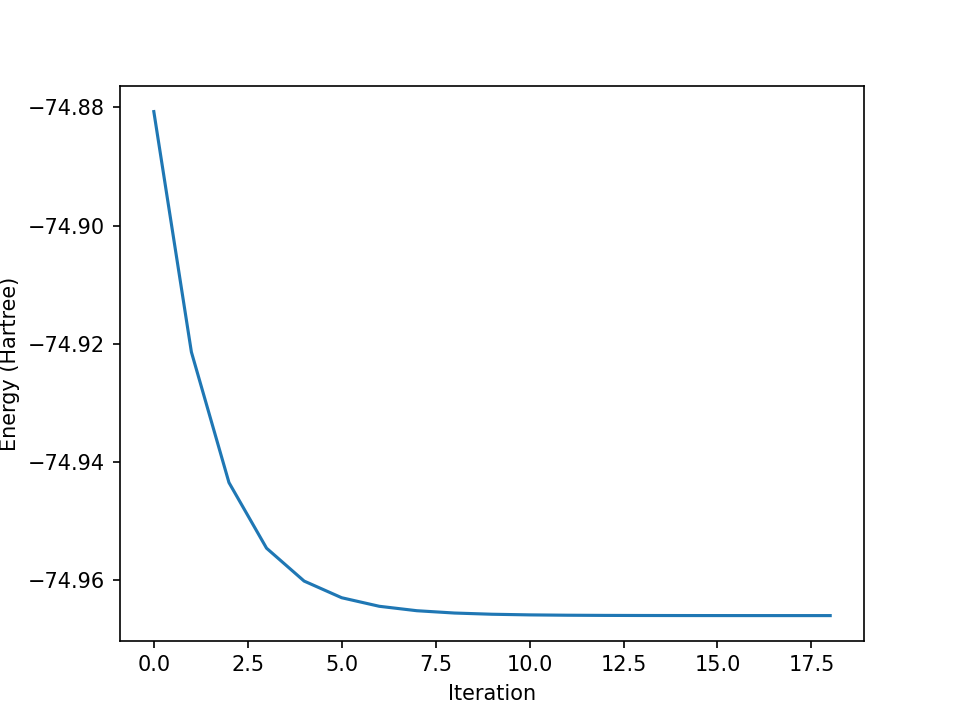

NGLWidget(max_frame=18)

In [4]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
import helpers
from IPython.display import display
import nglview as nv

def steepest_descent_step(values, gradient, step_size):
    return values - step_size * gradient

psi4.set_output_file("output.dat", True)
mol = psi4.geometry("""
O
H 1 1
H 1 1 2 60
""")

# Define the optimization parameters
step_size = 1 # We will use a fixed step size for simplicity
energy_diff = 1e10 # Initial energy difference; set to a high value
energy_threshold = 1e-6 # Quit if the absolute energy difference is below the threshold, 
maximum_iterations = 30 # Or quit if you exceed the maximum number of iterations

# Calculate the initial energy and gradient
gradient = psi4.gradient("scf/sto-3g") # Use this method
previous_energy = psi4.core.variable("CURRENT ENERGY")

# Store data from the optimization steps
n_steps = 1
energies = [previous_energy]
geometries = [mol.geometry()]

# Perform the iterations
while energy_diff > energy_threshold and n_steps < maximum_iterations:
    
    # Get the previous geometry and gradient
    previous_geometry = np.array(mol.geometry()) # Note that this geometry is in Bohr
    gradient = np.array(gradient)
    
    # Update the geometry from the previous gradient
    current_geometry = steepest_descent_step(previous_geometry, gradient, step_size)
    # Set the geometry of the Psi4 molecule to the updated geometry
    mol.set_geometry(psi4.core.Matrix.from_array(current_geometry))
    
    # Calculate the new gradient and energy
    gradient = psi4.gradient("scf/sto-3g")
    current_energy = psi4.core.variable("CURRENT ENERGY")
    
    # Store the values of the updated energy and geometry
    energies.append(current_energy)
    geometries.append(mol.geometry())
    
    print(n_steps, current_energy, current_energy - previous_energy)
    
    # Calculate the energy difference between the current geometry and the previous geometry. 
    energy_diff = np.abs(current_energy - previous_energy)

    # Update the variables
    previous_energy = current_energy
    n_steps += 1

# Plot the energy vs the iteration step
plt.figure()
plt.plot(range(n_steps), energies)
plt.xlabel("Iteration")
plt.ylabel("Energy (Hartree)")
plt.show()

# Visualize the optimization trajectory
traj = helpers.trajectory_from_coordinates(mol, geometries)
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

### Conjugate Gradient
The conjugate gradient method aims to remedy the oscillatory nature of the steepest descent algorithm. Instead of moving along the steepest descent direction each time, the conjugate gradient method mixes the current steepest descent direction with the previous descent direction as follows:
\begin{align}
    \textbf{d}_i = -\textbf{g}_i + \beta_i \textbf{d}_{i-1},
\end{align}
where $\beta$ is a constant that can be chosen using different methods. The first step in the conjugate gradient method is in the steepest descent direction while the remaining steps are determined by the above equation.

### Newton-Raphson and other Hessian Methods
In the Newton-Raphson method, the Hessian matrix is also used in addition to the gradient. The coordinates of the stationary point is estimated using the following equation:
\begin{align}
    \textbf{q}^{k+1} = \textbf{q}^k - (\textbf{H}^k)^{-1} \textbf{g}^k,
\end{align}
where $\textbf{H}$ is the Hessian matrix with matrix elements given by:
\begin{align}
    H_{ij} = \frac{\partial^2 U}{\partial q_i \partial q_j}.
\end{align}

This optimization method is expensive. Constructing the Hessian matrix, even analytically, is expensive, and the inversion of the matrix formally scales as $n^3$, where $n$ is the number of coordinates. Alternative optimization methods sometimes estimate a guess Hessian or calculate the Hessian only for a few steps in the optimization. Examples of these approximate schemes are the BFGS or L-BFGS methods.

The Newton-Raphson method optimizes to the nearest stationary point, which may not be a minimum. 

1 -74.95407529526057 -0.07335015252806443
2 -74.96499430794503 -0.010919012684468044
3 -74.96598951142104 -0.00099520347600901
4 -74.96599012255474 -6.111337000902495e-07


<IPython.core.display.Javascript object>


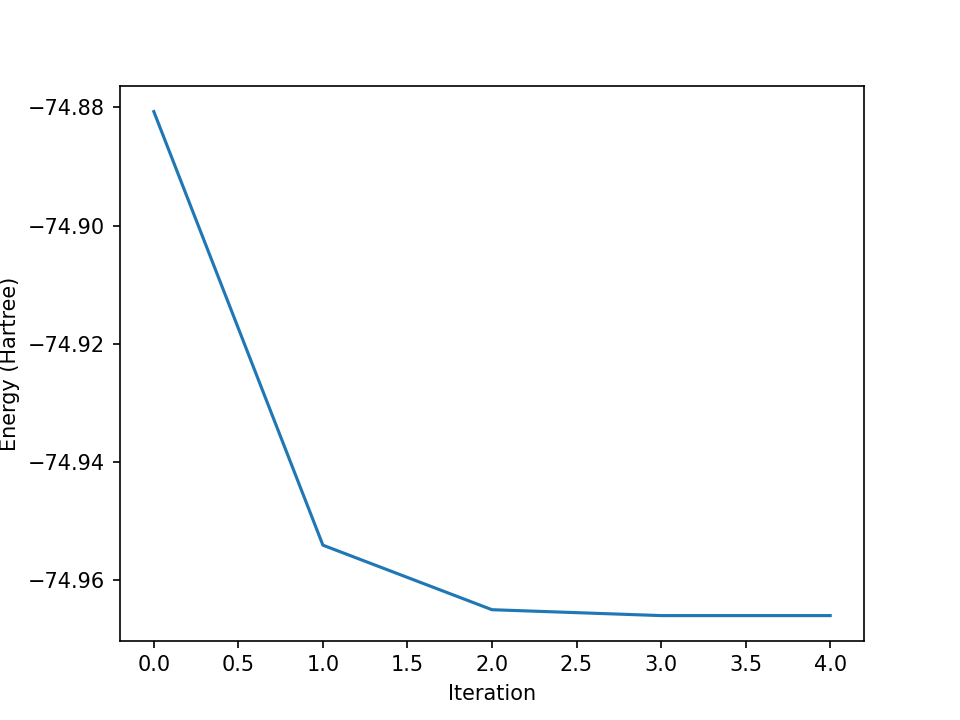

NGLWidget(max_frame=4)

In [5]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
import helpers
from IPython.display import display
import nglview as nv

def newton_raphson_step(values, gradient, hessian):
    # Compute the inverse of the Hessian
    hessian_inv = np.linalg.inv(hessian)
    
    # Reshape the objects for better manipulation
    shape = values.shape
    values = values.flatten()
    gradient = gradient.flatten()
    
    # Update the values
    values = values - np.einsum("ij, j->i", hessian_inv, gradient)
    
    return values.reshape(shape)

psi4.set_output_file("output.dat", True)
mol = psi4.geometry("""
O
H 1 1
H 1 1 2 60
""")

# Define the optimization parameters
energy_diff = 1e10 # Initial energy difference; set to a high value
energy_threshold = 1e-6 # Quit if the absolute energy difference is below the threshold, 
maximum_iterations = 30 # Or quit if you exceed the maximum number of iterations

# Calculate the initial energy, gradient, and Hessian
hessian = psi4.hessian("scf/sto-3g") # Use this method
gradient = psi4.core.variable("CURRENT GRADIENT")
previous_energy = psi4.core.variable("CURRENT ENERGY")

# Store data from the optimization steps
n_steps = 1
energies = [previous_energy]
geometries = [mol.geometry()]

# Perform the iterations
while energy_diff > energy_threshold and n_steps < maximum_iterations:
    
    # Get the previous geometry and gradient
    previous_geometry = np.array(mol.geometry()) # Note that this geometry is in Bohr
    gradient = np.array(gradient)
    hessian = np.array(hessian)
    
    # Update the geometry from the previous gradient
    current_geometry = newton_raphson_step(previous_geometry, gradient, hessian)
    # Set the geometry of the Psi4 molecule to the updated geometry
    mol.set_geometry(psi4.core.Matrix.from_array(current_geometry))
    
    # Calculate the new energy, gradient, and Hessian
    hessian = psi4.hessian("scf/sto-3g")
    gradient = psi4.core.variable("CURRENT GRADIENT")
    current_energy = psi4.core.variable("CURRENT ENERGY")
    
    # Store the values of the updated energy and geometry
    energies.append(current_energy)
    geometries.append(mol.geometry())
    
    print(n_steps, current_energy, current_energy - previous_energy)
    
    # Calculate the energy difference between the current geometry and the previous geometry. 
    energy_diff = np.abs(current_energy - previous_energy)

    # Update the variables
    previous_energy = current_energy

    n_steps += 1

# Plot the energy vs the iteration step
plt.figure()
plt.plot(range(n_steps), energies)
plt.xlabel("Iteration")
plt.ylabel("Energy (Hartree)")
plt.show()

# Visualize the optimization trajectory
traj = helpers.trajectory_from_coordinates(mol, geometries)
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

### Convergence Criteria
We used above the energy difference as the only criteria for determining the convergence of the optimization. However, other convergence criteria are also often used. For example, at the stantionary state, the gradient should be zero, so we can check whether the maxium element of the gradient or the RMS value of the gradient is below a certain threshold. We can also check the convergence of the geometry, using for example the maximum displacement or the RMS displacemnt. 

### Choice of Coordinates
The choice of coordinate systems has a substanital effect on the speed and convergence of the optimization. Optimizing the geoemtry using the standard Cartesian coordinates is often a poor choice. Using internal coordinates or a redundant set of internal coordinates is usually better.

### Constraints
Constrained optimization can performed to fix certain geometric parameters in the system. For example, a certain dihedral angle can be fixed to a given value.

We will show a few example optimizations below:

In [6]:
# Optimize a water molecule
import psi4
import helpers
from IPython.display import display
import nglview as nv
import os

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
O
H 1 1
H 1 1 2 60
""")

psi4.set_options({"PRINT_TRAJECTORY_XYZ_FILE": True})

psi4.optimize('scf/sto-3g')

# Visualize the optimization trajectory
traj = helpers.trajectory_from_xyz(mol, "geoms.xyz")
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

os.remove("geoms.xyz")

Optimizer: Optimization complete!


NGLWidget(max_frame=5)

We can verify that the obtained structure is the minimum by calculating the Hessian index, as mentioned above. Simply, we can calculate the vibrational frequencies and check whether there are any imaginary frequencies. If there is none, then it is a minimum structure. If there is one, then it is a transition state. If there are more than one imaginary frequencies, then it is a higher order saddle point. Note that sometimes an imaginary frequency is represented by a negative frequency. 

In [7]:
e, wfn = psi4.frequency('scf/sto-3g', return_wfn=True)
print(wfn.frequencies().np)

[2170.65162715 4140.21992872 4390.92190903]


In [8]:
# Optimize HOOH freezing the dihedral to the specified value
import psi4
import helpers
from IPython.display import display
import nglview as nv
import os

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
  H
  O 1 0.90
  O 2 1.40 1 100.0
  H 3 0.90 2 100.0 1 90.0
""")

psi4.set_options({"frozen_dihedral": "1 2 3 4", 
                  "PRINT_TRAJECTORY_XYZ_FILE": True})
psi4.optimize('scf/sto-3g')

# Visualize the optimization trajectory
traj = helpers.trajectory_from_xyz(mol, "geoms.xyz")
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

os.remove("geoms.xyz")

Optimizer: Optimization complete!


NGLWidget(max_frame=5)

In [9]:
# Optimize HOOH towards the specified dihedral value
import psi4
import helpers
from IPython.display import display
import nglview as nv
import os

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
  H
  O 1 0.90
  O 2 1.40 1 100.0
  H 3 0.90 2 100.0 1 90.0
""")

psi4.set_options({"fixed_dihedral": "1 2 3 4 120", 
                  "PRINT_TRAJECTORY_XYZ_FILE": True})
psi4.optimize('scf/sto-3g')

# Visualize the optimization trajectory
traj = helpers.trajectory_from_xyz(mol, "geoms.xyz")
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

os.remove("geoms.xyz")

Optimizer: Optimization complete!


NGLWidget(max_frame=10)

In [10]:
# Optimize HOOH towards the specified dihedral value using Cartesian coordinates
import psi4
import helpers
from IPython.display import display
import nglview as nv
import os

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
  H
  O 1 0.90
  O 2 1.40 1 100.0
  H 3 0.90 2 100.0 1 90.0
""")

psi4.set_options({"fixed_dihedral": "1 2 3 4 120", 
                  "PRINT_TRAJECTORY_XYZ_FILE": True})
psi4.optimize('scf/sto-3g')

# Visualize the optimization trajectory
traj = helpers.trajectory_from_xyz(mol, "geoms.xyz")
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

os.remove("geoms.xyz")

Optimizer: Optimization complete!


NGLWidget(max_frame=10)

### Transition States and Intrinsic Reaction Coordinates (IRC)

Sometimes, the interest is not in finding the minimum geometry but rather in finding a transition state. It should be noted that finding the transition state is more difficult than finding the minimum and the optimization algorithms are less robust. For example, we showed before the potential energy surface of water molecule and noted that the linear form of water molecule is a transition state. Let's try to optimize water to find the transition state.

In [11]:
# Optimize a water molecule
import psi4
import helpers
from IPython.display import display
import nglview as nv
import os

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
O
H 1 1
H 1 1 2 160
symmetry c1
""")

psi4.set_options({"opt_type": "ts",
                  "PRINT_TRAJECTORY_XYZ_FILE": True})

psi4.optimize('scf/sto-3g')

# Visualize the optimization trajectory
traj = helpers.trajectory_from_xyz(mol, "geoms.xyz")
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

os.remove("geoms.xyz")

e, wfn = psi4.frequency('scf/sto-3g', return_wfn=True)
print(wfn.frequencies().np)

Optimizer: Optimization complete!


NGLWidget(max_frame=6)

[-2412.99692082 -2412.99686883  4508.07239676  5056.77609539]


As shown in the potential energy surface of water, there is a minimum energy path that leads from the transition state to the minimum. The minimum energy path that connects the transition state to the minimum in the mass-weighted coordinates is called the intrinsic reaction coordinate (IRC). The IRC is important in reaction dynamics, and formally it the reaction path taken in the limit of a zero temperature. Let's follow the IRC path for water molecule from the transition state to the minimum.

In [12]:
# Optimize a water molecule
import psi4
import helpers
from IPython.display import display
import nglview as nv
import os

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
O
H 1 1
H 1 1 2 179.9 # can fail if the molecule is exactly symmetric
symmetry c1
""")

psi4.set_options({"opt_type": "irc",
                  "PRINT_TRAJECTORY_XYZ_FILE": True})

psi4.optimize('scf/sto-3g')

# Visualize the optimization trajectory
traj = helpers.trajectory_from_xyz(mol, "irc_forward.xyz")
view = nv.NGLWidget()
view.add_trajectory(traj)
display(view)

os.remove("irc_forward.xyz")

Optimizer: Optimization complete!


NGLWidget(max_frame=9)

## Rotational and Vibrational Spectroscopy

Using the Born-Oppenheimer approximation, the nuclear and electronic motions are separable. So far, we have mostly been interested in solving the electronic Schrodinger's equation. To predict the nuclear motion instead, we can use the nuclear Schrodinger's equation given by:
\begin{align}
    \left [- \sum_i^N \frac{1}{2m_i} \nabla^2_i + V(\textbf{q}) \right ] \Xi(\textbf{q}) = E \Xi(\textbf{q}),
\end{align}
where $N$ is the number of atoms, $m$ is the atomic mass, $V$ the potential energy from the potential energy surfaces, and $\Xi$ is the nuclear wavefunction. $V$ and $\Xi$ are expressed using a suitable coordinate system $\textbf{q}$. Solution of this equation provides the backbone for rotational and vibrational spectroscopy.

### Rotational Spectroscopy
The rotational energy levels of molecules are typically predicted using the rigid-rotor approximation, where the geometry of the molecule is assumed to be fixed upon rotation. The energy levels for the rigid rotor approximation are shown to be:
\begin{align}
    E_J = \frac{J(J+1) \hbar^2}{2I},
\end{align}
where $J$ is the rotational quantum number and $I$ is the moment of inertia given by:
\begin{align}
    I = \sum_k^{\rm nuclei} m_k r_k^2.
\end{align}
The selection rule in the rigid rotor approximation is $\Delta J=\pm 1$. The energy required to transition from the level $J$ to level $J+1$ is 
\begin{align}
\Delta E = \frac{\{(J+1)[(J+1)+1]-J(J+1)\}\hbar^2}{2I} = \frac{2(J+1) \hbar^2}{2I}.
\end{align}
In terms of the absorption frequency, this can be expressed as
\begin{align}
    \nu_J = \frac{\Delta E}{h} = \frac{2(J+1) \hbar^2}{2hI} = 2(J+1)B,
\end{align}
where $B$ is the rotational constant given by:
\begin{align}
    B = \frac{h}{8 \pi^2 I}.
\end{align}
Nonlinear molecules have three components for the moment of inertia and thus have three different rotational constants.

Because the rotatioal frequency only depends on the moment of inertia, it is fairly easy to compute. It is only required that a good equilibrium geometry be predicted, which can be readily perform even using low levels of theory. 

In [13]:
import psi4

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)
mol = psi4.geometry("""
O
H 1 1
H 1 1 2 100
""")

print(mol.rotational_constants().np)
print(mol.rotational_symmetry_number())

psi4.optimize("scf/sto-3g")

print(mol.rotational_constants().np)
print(mol.rotational_symmetry_number())

[22.79248981 14.25192166  8.76884708]
2
Optimizer: Optimization complete!
[23.27781723 14.56009989  8.95734675]
2


### Vibrational Spectroscopy

To predict the vibrational motion of molecules, the harmonic oscillator approximation is usually employed. For a diatomic molecule, the potential energy is given by:
\begin{align}
    V(r) = \frac{1}{2} k (r-r_{\rm eq})^2
\end{align}
where $k$ is the force constant and $r_{\rm eq}$ is the equilibrium bond length. The force constant is from the second derivative of the energy with respect to $r$ evaluated at $r=r_{\rm eq}$.

Under the harmonic oscillator approximation, the vibrational energy levels are given by:
\begin{align}
    E_n = \left (n + \frac{1}{2} \right ) h \omega,
\end{align}
where $n$ is the vibrational quantum number ($n=0, 1, 2, \cdots$) and
\begin{align}
    \omega = \frac{1}{2 \pi} \sqrt{\frac{k}{\mu}},
\end{align}
where $\mu$ is the reduced mass. Notice that the lowest vibrational energy $E_0 = \frac{1}{2} h \omega$ is not equal to zero. This is the **zero-point energy**, which can contribute a significant correction to the electronic energy.

For polyatomic systems, the harmonic oscillator approximation leads to a system of coupled differential equations if the Cartesian coordinate system is used. However, transforming the coordinates to a unique set of mass-dependent spatial coordinates $\textbf{q}$ decouple the system of equation. Vibrations along the $\textbf{q}$ coordinate system are called the **normal modes**. The number of vibrational modes in a molecule is equal to $3N-6$ for nonlinear molecules and $3N-5$ for linear molecules, where $N$ is the number of atoms. For example, for a diatomic molecule, there is only one vibrational mode. 

From the above equations, it is clear that in order to predict the vibrational motion, we only need to determine the force constant $k$. This can be determined from the Hessian, or the second derivative of the energy with respect to the nuclear coordinates. As mentioned above, the Hessian can be either determined analytically or numerically for a given level of theory. To estimate the vibrational frequency, it is critical that the level of theory frequency calculation is the same as the one used for geoemtry optimization. Different levels of theory can predict different stationary state geometries, and therefore it is useless to predict the geometry using one method and the frequency using another method.

In the prediction of vibrational frequencies, it is often observed that certain levels of theory have systematic deviations from the experimental frequencies. For example, frequencies predicted using the HF/6-31G(d) level are often scaled down by over 10%, which substantially improves the agreement with the experimental data. 

Vibrational transitions occur in the infrared region of the electromagnetic spectrum. They can be probed with IR spectroscopy or Raman spectroscopy. For a vibrational mode to be IR active, it needs to change the dipole moment of the molecule. Estimating the IR intensity requires taking mixed second derivatives of the energy with respect to geometric motion and with respect to an external electric field. Such a derivative may or may not be available for a given level of theory. For a vibrational mode to be Raman active, it needs to change the polarizability of the molecule. Predicting Raman intensities requires mixed third derivatives, which are difficult to compute.

We will show below a few exmaples for predicting the vibrational modes and vibrational frequencies.

#### Diatomic Molecules
For a diatomic molecule, the number of vibrational modes is 1. A homonuclear diatomic molecule will not have an IR-active mode. The IR spectrum of a heteronuclear diatomic molecule will have a single peak.

Optimizer: Optimization complete!


<IPython.core.display.Javascript object>


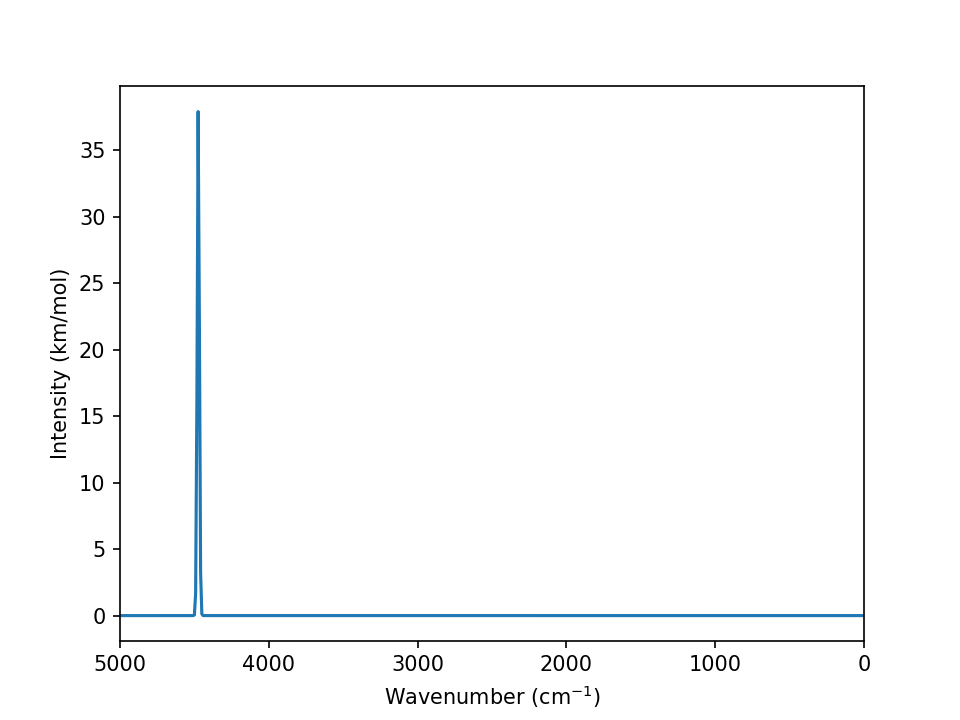

NGLWidget(max_frame=1)

In [14]:
import psi4
import helpers
import matplotlib.pyplot as plt
from IPython.display import display
import nglview as nv

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
H 0 0 0
F 0 0 1.1""")
psi4.optimize("scf/sto-3g")
e, wfn = psi4.frequency("scf/sto-3g", return_wfn=True)

trajectories, x, y = helpers.vibrational_modes_trajectories(wfn)

plt.figure()
plt.plot(x, y)
plt.xlim(5000, 0)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (km/mol)')
plt.show()

view = nv.NGLWidget()
view.add_trajectory(trajectories[0])
display(view)

### Linear Triatomic Molecules
A linear triatomic molecule, such as CO$_2$, will have $3 \times 3-5=4$ normal modes. So why do only two peaks appear in the IR spectrum shown below?

Optimizer: Optimization complete!


<IPython.core.display.Javascript object>


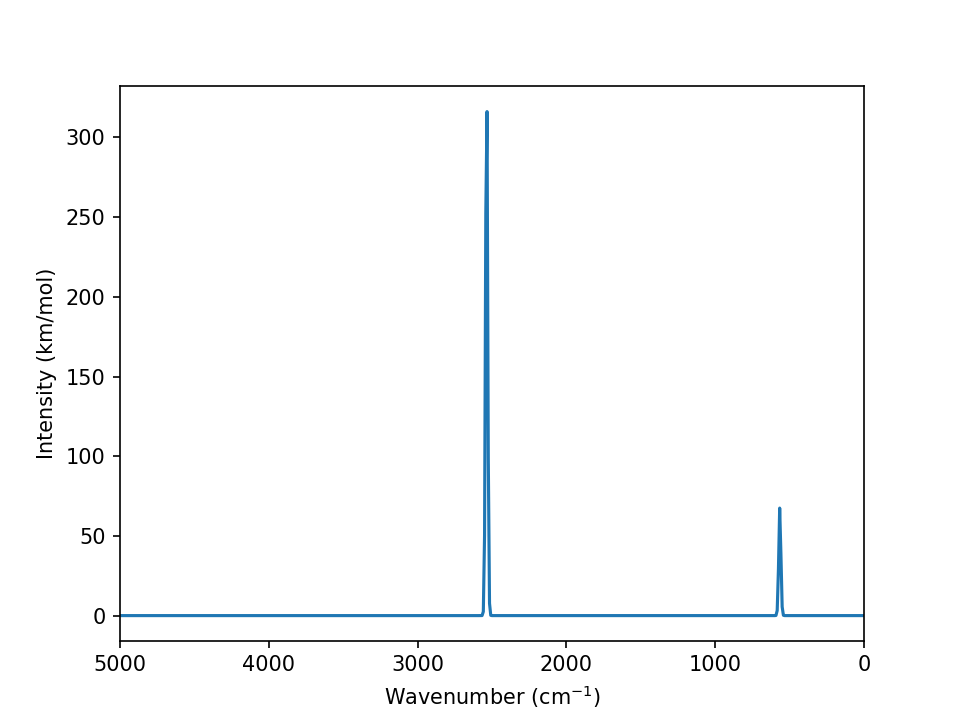

GridBoxViewAndPlayer(children=(NGLWidget(layout=Layout(width='200px'), max_frame=1), NGLWidget(layout=Layout(w…

In [15]:
import psi4
import helpers
import matplotlib.pyplot as plt
from IPython.display import display
import nglview as nv
import nglview.sandbox.grid_view

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
O 0 0 0
C 0 0 1
O 0 0 2""")
psi4.optimize("scf/sto-3g")
e, wfn = psi4.frequency("scf/sto-3g", return_wfn=True)

trajectories, x, y = helpers.vibrational_modes_trajectories(wfn)

plt.figure()
plt.plot(x, y)
plt.xlim(5000, 0)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (km/mol)')
plt.show()

views = [nv.show_mdtraj(traj) for traj in trajectories]
for view in views:
    view.layout.width = '200px'    
nv.sandbox.grid_view.grid_view(views, 4)

### Nonlinear Triatomic Molecules
A nonlinear triatomic molecule, like H$_2$O, will have three vibrational modes.

Optimizer: Optimization complete!


<IPython.core.display.Javascript object>


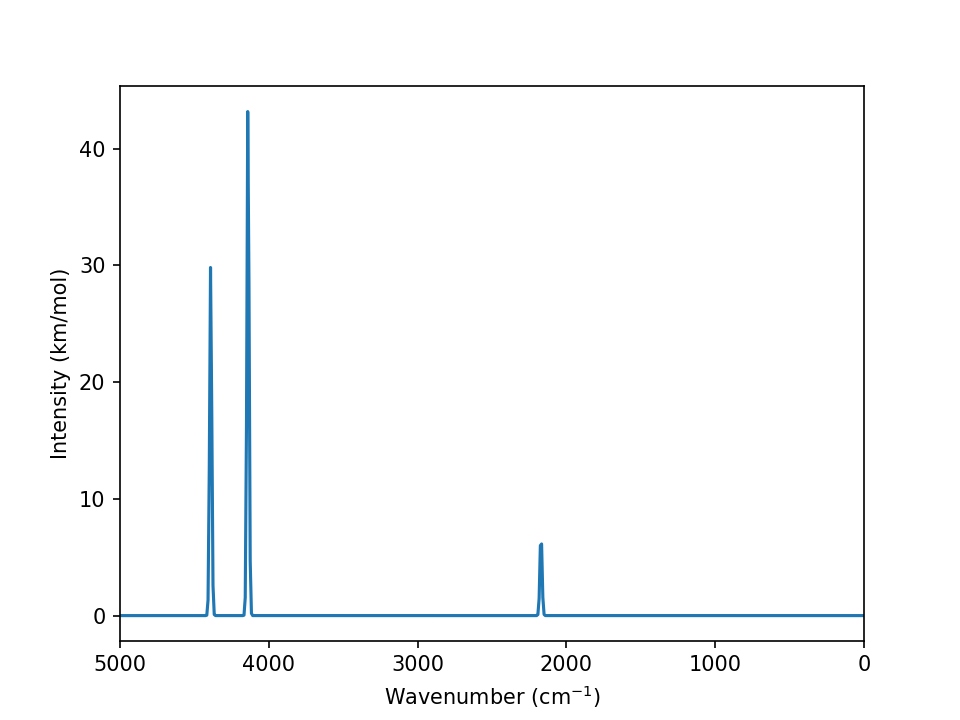

GridBoxViewAndPlayer(children=(NGLWidget(layout=Layout(width='200px'), max_frame=1), NGLWidget(layout=Layout(w…

In [16]:
import psi4
import helpers
import matplotlib.pyplot as plt
from IPython.display import display
import nglview as nv
import nglview.sandbox.grid_view

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
O
H 1 1
H 1 1 2 100""")
psi4.optimize("scf/sto-3g")
e, wfn = psi4.frequency("scf/sto-3g", return_wfn=True)

trajectories, x, y = helpers.vibrational_modes_trajectories(wfn)

plt.figure()
plt.plot(x, y)
plt.xlim(5000, 0)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (km/mol)')
plt.show()

views = [nv.show_mdtraj(traj) for traj in trajectories]
for view in views:
    view.layout.width = '200px'    
nv.sandbox.grid_view.grid_view(views, 4)

## Thermodynamic Analysis
So far, we have been concerned with the properties of a *single* molecule. However, chemistry usually deals with a huge number of molecules. One mole is equal to $6.022 \times 10^{23}$. Statistical mechanics makes the connection between the microscopic and macroscopic worlds.

In statistical mechanics, an ensemble is a collection of molecules that have a fixed set of macroscopic parameters. In the canonical ensemble, the number of particles, temperature, and volume are fixed (NVT condition). The parition function $Q$ is the fundamental quantity that describes the ensemble. For the canonical ensemble, the partition function is
\begin{align}
    Q(N, V, T) = \sum_i e^{-E_i(N, V)/k_B T},
\end{align}
where $i$ runs over all possible states in the system having energy $E_i$. Thermodynamic parameters can be derived from the partition function as follows:
\begin{align}
    U &= k_B T^2 \left ( \frac{\partial {\rm ln} Q}{\partial T} \right )_{N, V} \\
    H &= U + PV  = k_B T^2 \left ( \frac{\partial {\rm ln} Q}{\partial T} \right )_{N, V} + 
                   k_B T V \left ( \frac{\partial {\rm ln} Q}{\partial V} \right )_{N, T}\\
    S &= k_B {\rm ln} Q + k_B T \left ( \frac{\partial {\rm ln} Q}{\partial T} \right )_{N, V} \\
    G &= H - T S = k_B T V \left ( \frac{\partial {\rm ln} Q}{\partial T} \right )_{N, V}
                  -k_B T {\rm ln} Q .
\end{align}

For an ideal gas, the partition function $Q$ can be written in terms of the molecular partition function $q$:
\begin{align}
    Q = \frac{q^N}{N!}
\end{align}
where $N$ is the number of particles and the factor $N!$ accounts for the indistinguishability of the particles. The molecular partition function in the canonical ensemble is given by:
\begin{align}
    q = \sum_k^{\rm levels} g_k e^{-\epsilon_k/k_B T},
\end{align}
where $g_k$ is the degeneracy of energy level $k$ which has the energy $\epsilon_k$.

If the molecular energy $\epsilon$ is assumed to be a separable sum of electronic, translational, rotational, and vibrational terms, the molecular partition function $q$ can be written as:
\begin{align}
    q = q_{\rm elec} q_{\rm trans} q_{\rm rot} q_{\rm vib}.
\end{align}
Standard expressions for the individual partition functions can be found in physical chemistry textbooks.

Obtaining the partition function from quantum chemical calculations requires vibrational frequency calculation for determining the vibrational contribution. The remaining components are easier to compute. Standard quantum chemistry packages print out the thermodynamic analysis after frequency computations. The vibrational zero-point energy contribution to the energy is often significant. Note that the computed thermodynamic quantities here are *absolute* quantities (i.e. relative to infinitely separated electrons and nuclei). These are not the usual heat of formation, which are relative to some standard state.

In [17]:
import psi4

psi4.core.clean_options()
psi4.set_output_file("output.dat", True)

mol = psi4.geometry("""
O
H 1 1
H 1 1 2 100""")
psi4.optimize("scf/sto-3g")
e, wfn = psi4.frequency("scf/sto-3g", return_wfn=True)

Optimizer: Optimization complete!


```
  ==> Thermochemistry Components <==

  Entropy, S
    Electronic S            0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K] (multiplicity = 1)
    Translational S        34.608 [cal/(mol K)]      144.801 [J/(mol K)]       0.05515177 [mEh/K] (mol. weight = 18.0106 [u], P = 101325.00 [Pa])
    Rotational S           10.673 [cal/(mol K)]       44.655 [J/(mol K)]       0.01700828 [mEh/K] (symmetry no. = 2)
    Vibrational S           0.001 [cal/(mol K)]        0.003 [J/(mol K)]       0.00000103 [mEh/K]
  Total S                  45.282 [cal/(mol K)]      189.459 [J/(mol K)]       0.07216108 [mEh/K]
  Correction S              0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K]

  Constant volume heat capacity, Cv
    Electronic Cv           0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K]
    Translational Cv        2.981 [cal/(mol K)]       12.472 [J/(mol K)]       0.00475022 [mEh/K]
    Rotational Cv           2.981 [cal/(mol K)]       12.472 [J/(mol K)]       0.00475022 [mEh/K]
    Vibrational Cv          0.006 [cal/(mol K)]        0.026 [J/(mol K)]       0.00000981 [mEh/K]
  Total Cv                  5.968 [cal/(mol K)]       24.969 [J/(mol K)]       0.00951025 [mEh/K]
  Correction Cv             0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K]

  Constant pressure heat capacity, Cp
    Electronic Cp           0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K]
    Translational Cp        4.968 [cal/(mol K)]       20.786 [J/(mol K)]       0.00791703 [mEh/K]
    Rotational Cp           2.981 [cal/(mol K)]       12.472 [J/(mol K)]       0.00475022 [mEh/K]
    Vibrational Cp          0.006 [cal/(mol K)]        0.026 [J/(mol K)]       0.00000981 [mEh/K]
  Total Cp                  7.955 [cal/(mol K)]       33.284 [J/(mol K)]       0.01267706 [mEh/K]
  Correction Cp             0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K]

  ==> Thermochemistry Energy Analysis <==

  Raw electronic energy, E0
  Total E0, Electronic energy at well bottom at 0 [K]                  -74.96599007 [Eh]

  Zero-point energy, ZPE_vib = Sum_i nu_i / 2
    Electronic ZPE          0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Translational ZPE       0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Rotational ZPE          0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Vibrational ZPE        15.298 [kcal/mol]       64.008 [kJ/mol]       0.02437952 [Eh]        5350.686 [cm^-1]
  Correction ZPE           15.298 [kcal/mol]       64.008 [kJ/mol]       0.02437952 [Eh]        5350.686 [cm^-1]
  Total ZPE, Electronic energy at 0 [K]                                -74.94161055 [Eh]

  Thermal Energy, E (includes ZPE)
    Electronic E            0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Translational E         0.889 [kcal/mol]        3.718 [kJ/mol]       0.00141628 [Eh]
    Rotational E            0.889 [kcal/mol]        3.718 [kJ/mol]       0.00141628 [Eh]
    Vibrational E          15.299 [kcal/mol]       64.009 [kJ/mol]       0.02437980 [Eh]
  Correction E             17.076 [kcal/mol]       71.446 [kJ/mol]       0.02721235 [Eh]
  Total E, Electronic energy at  298.15 [K]                            -74.93877771 [Eh]

  Enthalpy, H_trans = E_trans + k_B * T
    Electronic H            0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Translational H         1.481 [kcal/mol]        6.197 [kJ/mol]       0.00236046 [Eh]
    Rotational H            0.889 [kcal/mol]        3.718 [kJ/mol]       0.00141628 [Eh]
    Vibrational H          15.299 [kcal/mol]       64.009 [kJ/mol]       0.02437980 [Eh]
  Correction H             17.668 [kcal/mol]       73.925 [kJ/mol]       0.02815654 [Eh]
  Total H, Enthalpy at  298.15 [K]                                     -74.93783353 [Eh]

  Gibbs free energy, G = H - T * S
    Electronic G            0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Translational G        -8.837 [kcal/mol]      -36.975 [kJ/mol]      -0.01408304 [Eh]
    Rotational G           -2.293 [kcal/mol]       -9.596 [kJ/mol]      -0.00365474 [Eh]
    Vibrational G          15.298 [kcal/mol]       64.008 [kJ/mol]       0.02437949 [Eh]
  Correction G              4.168 [kcal/mol]       17.438 [kJ/mol]       0.00664171 [Eh]
  Total G, Free enthalpy at  298.15 [K]                                -74.95934836 [Eh]
```

## Useful Resources

- Cramer, C. J. *Essentials of Computational Chemistry: Theories and Models*, 2nd ed.; John Wiley & Sons: Chichester, England, 2004. (Section 2.4.1. Section 9.3. Chapter 10)  
- Jensen, F. *Introduction to Computational Chemistry*, 3rd ed.; John Wiley & Sons: Nashville, TN, 2017. (Chapter 13)